In [3]:
from math import *
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt

In [4]:
Ecut, E_of_Ecut = np.loadtxt('Ecut_sweep.dat').T
kpts, E_of_kpts = np.loadtxt('kpts_sweep.dat').T

In [5]:
def model(x, y_inf, A, b, k, phi):
    return y_inf + A * np.exp(-b * x) * np.cos(k * x - phi)

def objective(params, x, y):
    y_inf, A, b, k, phi = params
    y_pred = model(x, y_inf, A, b, k, phi)
    return np.sum((x * (y - y_pred)) ** 2)

In [6]:
results1 = sp.optimize.differential_evolution(objective,
                                             bounds = [(-12.5, -12.3), (-20, -10), (0, 0.5), (0.0, 0.2), (0, pi)],
                                             args = (Ecut, E_of_Ecut))
y_inf1, A1, b1, k1, phi1 = results1.x
print(results1.x, results1.success)

errors = abs(E_of_Ecut - y_inf1)
Ecut_converged = np.inf

for i, error in enumerate(errors[::-1]):
    if error > 0.002:
        Ecut_converged = Ecut[::-1][i - 1]
        break

print(Ecut_converged)

[-1.24083932e+01 -1.54141968e+01  3.76323911e-01  1.05491867e-01
  4.36357628e-05] True
25.0


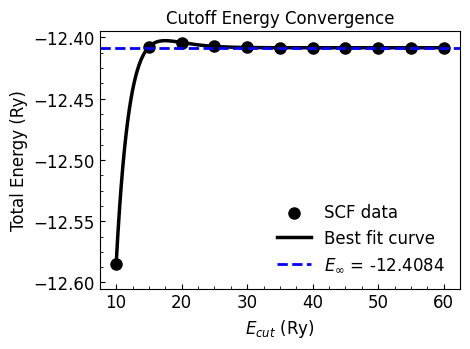

In [12]:
Ecut_fit = np.linspace(Ecut[0], Ecut[-1], 1000 + 1)

plt.figure(figsize = (4.8, 3.6))
plt.scatter(Ecut, E_of_Ecut, s = 64, c ='black', label = 'SCF data')
plt.plot(Ecut_fit, model(Ecut_fit, y_inf1, A1, b1, k1, phi1), lw = 2.5, c = 'black', label = 'Best fit curve')
plt.ylim(-12.605, -12.395)
plt.yticks([-12.6, -12.55, -12.5, -12.45, -12.4])

ax = plt.gca()
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(4))
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(4))

plt.title('Cutoff Energy Convergence', fontsize = 12)
plt.xlabel(r'$E_{cut}$ (Ry)', fontsize = 12)
plt.ylabel(r'Total Energy (Ry)', fontsize = 12)
plt.axhline(y_inf1, linewidth = 2.0, linestyle = '--', c = 'blue', label = rf'$E_{{\infty}}$ = {y_inf1:.4f}')
plt.tick_params(direction = 'in', which = 'both', labelsize = 12)
plt.legend(frameon = False, fontsize = 12)
plt.tight_layout()
plt.savefig('Ecut_convergence.png')
plt.savefig('Ecut_convergence.pdf')
plt.show()

In [9]:
results2 = sp.optimize.differential_evolution(objective,
                                             bounds = [(-12.5, -12.3), (10, 15), (1, 2), (2.0, 5.0), (0, pi)],
                                             args = (kpts, E_of_kpts))
y_inf2, A2, b2, k2, phi2 = results2.x
print(results2.x, results2.success)

errors = abs(E_of_kpts - y_inf2)
kpts_converged = np.inf

for i, error in enumerate(errors[::-1]):
    if error > 0.002:
        kpts_converged = kpts[::-1][i - 1]
        break

print(kpts_converged)

[-12.41772275  10.78321261   1.14714766   3.14109838   1.61214927] True
7.0


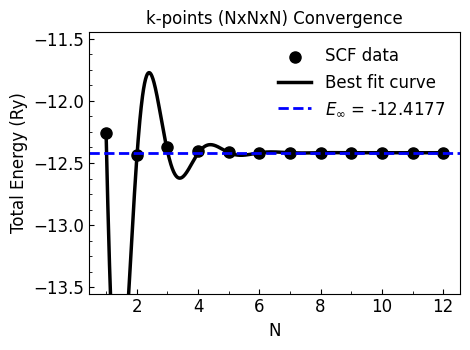

In [11]:
kpts_fit = np.linspace(kpts[0], kpts[-1], 1000 + 1)

plt.figure(figsize = (4.8, 3.6))
plt.scatter(kpts, E_of_kpts, s = 64, c ='black', label = 'SCF data')
plt.plot(kpts_fit, model(kpts_fit, y_inf2, A2, b2, k2, phi2), lw = 2.5, c = 'black', label = 'Best fit curve')
plt.ylim(-13.55, -11.45)
plt.yticks([-13.5, -13, -12.5, -12, -11.5])

ax = plt.gca()
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(4))

plt.title('k-points (NxNxN) Convergence')
plt.xlabel(r'N', fontsize = 12)
plt.ylabel(r'Total Energy (Ry)', fontsize = 12)
plt.axhline(y_inf2, linewidth = 2.0, linestyle = '--', c = 'blue', label = rf'$E_{{\infty}}$ = {y_inf2:.4f}')
plt.tick_params(direction = 'in', which = 'both', labelsize = 12)
plt.legend(frameon = False, fontsize = 12)
plt.tight_layout()
plt.savefig('kpts_convergence.png')
plt.savefig('kpts_convergence.pdf')
plt.show()